In [276]:
import pandas as pd
import numpy as np
# 使用相對路徑載入資料
df = pd.read_csv('../../all_data/house_price_monthly_bfill.csv', encoding='utf-8')

## no shift version PCA with Standardlize

In [277]:
date_list = df['date'].values

In [278]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [279]:
sta_scaler = StandardScaler()
df_trans = sta_scaler.fit_transform(df.drop('date',axis=1))

In [280]:
df_trans

array([[-2.11564731, -2.24610045, -1.95792635, ...,  0.54722765,
         1.01611205, -0.66491017],
       [-1.97582683, -2.03374134, -1.89128607, ...,  0.54089653,
         1.01292062, -0.35739974],
       [-1.97155284, -1.9955314 , -1.92101051, ...,  0.81946575,
         1.1006849 , -0.35739974],
       ...,
       [ 2.29083475,  2.30308725,  2.24856129, ...,  0.30664514,
         0.86132776,  2.96371281],
       [ 2.50331304,  2.55512591,  2.41875768, ...,  0.29398291,
         0.90919919,  2.96371281],
       [ 2.63031155,  2.76601541,  2.45998836, ...,  0.4003457 ,
         0.73526633,  2.96371281]])

In [281]:
# 陡坡圖看起來4個就好了 
dr = PCA(4, random_state=435)
dr.fit(df_trans)
pca = dr.transform(df_trans)
np.round(dr.explained_variance_ratio_, 2)

array([0.5 , 0.14, 0.13, 0.06])

In [282]:
df_pca_s = pd.DataFrame(pca)
df_pca_s['date'] = date_list

array([0.50207977, 0.64335502, 0.77348318, 0.83228646])

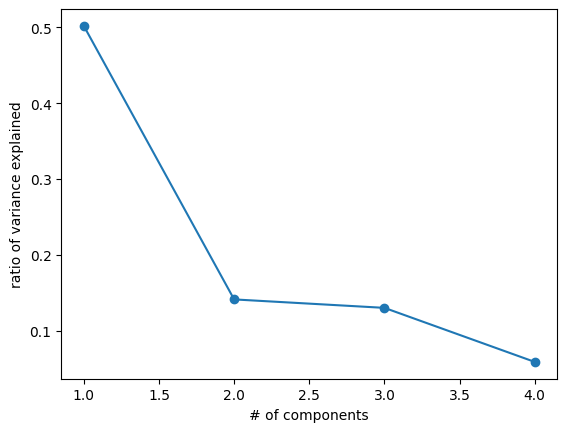

In [283]:
# 陡坡圖(scree plot)決定取幾個主成份 (通常取到累加70-80%)
dr.explained_variance_ratio_ # 各個主成份"詮釋資料集總變異量(也就是可解釋的意思)"的百分比(依序遞減排列)
import matplotlib.pyplot as plt
plt.plot(range(1, 5), dr.explained_variance_ratio_[:4], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')

# 快速計算累加百分比的方法
np.cumsum(dr.explained_variance_ratio_) # 4個就80%了

In [284]:
df_pca_s

,0,1,2,3,date
0,-3.682697,6.746287,-0.954329,-1.088259,2011-01-31
1,-3.571332,6.857326,-0.788407,-0.842988,2011-02-28
2,-3.520048,6.747022,-0.229505,-1.105230,2011-03-31
3,-3.395381,6.496783,0.401574,-1.205280,2011-04-30
4,-3.410980,6.254190,0.042186,-1.002170,2011-05-31
...,...,...,...,...,...
154,8.389488,-2.215544,3.299840,2.295005,2023-11-30
155,8.882785,-1.939501,2.859525,2.629713,2023-12-31
156,8.630592,-1.984815,2.571214,2.891202,2024-01-31
157,9.127455,-1.737887,2.474608,3.298148,2024-02-29


In [285]:
df_pca_s.columns

Index([0, 1, 2, 3, 'date'], dtype='object')

In [286]:
df_pca_s.columns = ['PCA_stand_0', 'PCA_stand_1', 'PCA_stand_2', 'PCA_stand_3', 'date']

In [287]:
# 將日期轉乘datetime格式
df_pca_s['date'] = pd.to_datetime(df_pca_s['date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
df_pca_s['date'] = df_pca_s['date'].dt.to_period('M')

In [288]:
df_pca_s.to_csv('../../all_data/pca_no_shift_stand.csv',encoding='utf-8', index=False)

## no shift PCA with MaxMinScaler

In [289]:
from sklearn.preprocessing import MinMaxScaler

In [290]:
mm_scaler = MinMaxScaler()
df_trans_mm = mm_scaler.fit_transform(df.drop('date',axis=1))

In [291]:
# 陡坡圖看起來4個就好了 
dr_mm = PCA(4, random_state=435)
dr_mm.fit(df_trans_mm)
pca_mm = dr_mm.transform(df_trans_mm)
np.round(dr_mm.explained_variance_ratio_, 2)

array([0.55, 0.13, 0.12, 0.05])

array([0.54837809, 0.68306874, 0.80486885, 0.85358767])

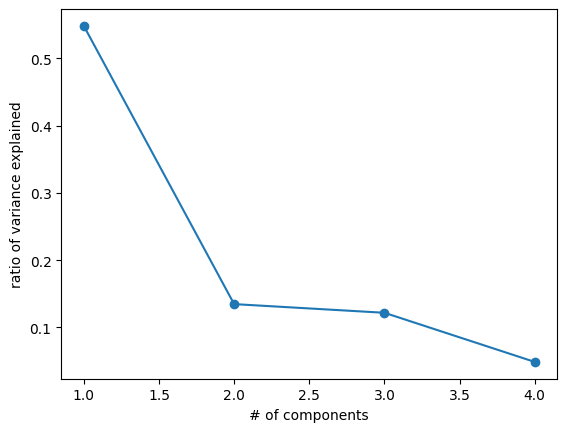

In [292]:
# 陡坡圖(scree plot)決定取幾個主成份 (通常取到累加70-80%)
dr_mm.explained_variance_ratio_ # 各個主成份"詮釋資料集總變異量(也就是可解釋的意思)"的百分比(依序遞減排列)
import matplotlib.pyplot as plt
plt.plot(range(1, 5), dr_mm.explained_variance_ratio_[:4], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')

# 快速計算累加百分比的方法
np.cumsum(dr_mm.explained_variance_ratio_)

In [293]:
df_pca_mm = pd.DataFrame(pca_mm)
df_pca_mm['date'] = date_list

In [294]:
df_pca_mm.columns

Index([0, 1, 2, 3, 'date'], dtype='object')

In [295]:
df_pca_mm.columns = ['PCA_mim_max_0', 'PCA_mim_max_1', 'PCA_mim_max_2', 'PCA_mim_max_3', 'date']

In [296]:
# 將日期轉乘datetime格式
df_pca_mm['date'] = pd.to_datetime(df_pca_mm['date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
df_pca_mm['date'] = df_pca_mm['date'].dt.to_period('M')

In [297]:
df_pca_mm.to_csv('../../all_data/pca_no_shift_min_max.csv',encoding='utf-8', index=False)

## PCA with Shift Standardlize

In [298]:
# 假設 df 是你的原始資料框
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [299]:
# # 創建lag特徵
for c_name in df:
    for i in range(1, 12):
        df[f'{c_name}_lag_{i}'] = df[c_name].shift(i) # shift就是把整個column的值往下移i格



# # 重設索引
# df.reset_index(inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_4248\4053383458.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{c_name}_lag_{i}'] = df[c_name].shift(i) # shift就是把整個column的值往下移i格
C:\Users\Tony\AppData\Local\Temp\ipykernel_4248\4053383458.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{c_name}_lag_{i}'] = df[c_name].shift(i) # shift就是把整個column的值往下移i格
C:\Users\Tony\AppData\Local\Temp\ipykernel_4248\4053383458.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [300]:
# 重設索引
df.reset_index(inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_4248\4224994893.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [301]:
df.fillna(method='bfill', inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_4248\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [302]:
df.isnull().sum().sum()

0

In [303]:
df

,date,house_index_xyi_all_tp,house_index_xyi_tp,house_index_xyi_new_tp,EA1101,EB0312,EB0911,EB18,EB21,EB22,...,預拌混凝土3000磅台北_lag_2,預拌混凝土3000磅台北_lag_3,預拌混凝土3000磅台北_lag_4,預拌混凝土3000磅台北_lag_5,預拌混凝土3000磅台北_lag_6,預拌混凝土3000磅台北_lag_7,預拌混凝土3000磅台北_lag_8,預拌混凝土3000磅台北_lag_9,預拌混凝土3000磅台北_lag_10,預拌混凝土3000磅台北_lag_11
0,2011-01-31,95.40,94.45,96.84,34.0,28.8,1.0978,86.78,95.85,89.85,...,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0
1,2011-02-28,97.69,97.34,98.23,34.0,28.8,1.3261,85.89,96.75,89.80,...,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0
2,2011-03-31,97.76,97.86,97.61,31.0,28.8,1.3950,83.66,96.60,88.00,...,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0
3,2011-04-30,97.31,98.38,95.69,29.0,28.8,1.2941,85.78,100.45,89.30,...,1890.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0
4,2011-05-31,96.85,97.02,96.60,27.0,28.8,1.6650,85.40,102.60,90.55,...,1890.0,1890.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0,1815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2023-11-30,162.10,150.51,179.66,20.0,42.5,2.8952,69.40,67.42,81.84,...,2625.0,2600.0,2600.0,2600.0,2375.0,2375.0,2375.0,2375.0,2375.0,2375.0
155,2023-12-31,163.19,150.85,181.90,22.0,45.4,2.6980,70.06,67.32,81.33,...,2625.0,2625.0,2600.0,2600.0,2600.0,2375.0,2375.0,2375.0,2375.0,2375.0
156,2024-01-31,167.57,156.36,184.58,27.0,46.2,1.7954,72.14,69.24,82.94,...,2625.0,2625.0,2625.0,2600.0,2600.0,2600.0,2375.0,2375.0,2375.0,2375.0
157,2024-02-29,171.05,159.79,188.13,29.0,54.0,3.0751,73.22,70.23,83.59,...,2625.0,2625.0,2625.0,2625.0,2600.0,2600.0,2600.0,2375.0,2375.0,2375.0


In [304]:
shift_sta_scaler = StandardScaler()
shift_df_trans = shift_sta_scaler.fit_transform(df.drop('date',axis=1))

In [305]:
shift_df_trans

array([[-2.11564731, -2.24610045, -1.95792635, ..., -0.62975912,
        -0.62929911, -0.62154737],
       [-1.97582683, -2.03374134, -1.89128607, ..., -0.62975912,
        -0.62929911, -0.62154737],
       [-1.97155284, -1.9955314 , -1.92101051, ..., -0.62975912,
        -0.62929911, -0.62154737],
       ...,
       [ 2.29083475,  2.30308725,  2.24856129, ...,  2.43109092,
         2.56624453,  2.63875688],
       [ 2.50331304,  2.55512591,  2.41875768, ...,  2.43109092,
         2.56624453,  2.63875688],
       [ 2.63031155,  2.76601541,  2.45998836, ...,  3.66089674,
         2.56624453,  2.63875688]])

In [306]:
dr_shift_s = PCA(4,random_state=435)
dr_shift_s.fit(shift_df_trans)
pca_shift = dr_shift_s.transform(shift_df_trans)
np.round(dr_shift_s.explained_variance_ratio_, 2)

array([0.48, 0.16, 0.12, 0.05])

In [307]:
shift_df_pca_s = pd.DataFrame(pca_shift)
shift_df_pca_s['date'] = date_list

array([0.4762796 , 0.6377223 , 0.75740577, 0.80581552])

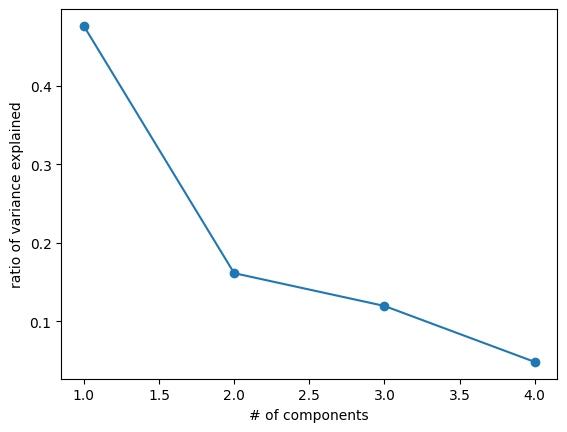

In [308]:
# 陡坡圖(scree plot)決定取幾個主成份 (通常取到累加70-80%)
dr_shift_s.explained_variance_ratio_ # 各個主成份"詮釋資料集總變異量(也就是可解釋的意思)"的百分比(依序遞減排列)
import matplotlib.pyplot as plt
plt.plot(range(1,5), dr_shift_s.explained_variance_ratio_[:4], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')

# 快速計算累加百分比的方法
np.cumsum(dr_shift_s.explained_variance_ratio_) # 4個就80%了

In [309]:
shift_df_pca_s.columns

Index([0, 1, 2, 3, 'date'], dtype='object')

In [310]:
shift_df_pca_s.columns = ['shift_PCA_stand_0', 'shift_PCA_stand_1', 'shift_PCA_stand_2', 'shift_PCA_stand_3', 'date']

In [311]:
# 將日期轉乘datetime格式
shift_df_pca_s['date'] = pd.to_datetime(shift_df_pca_s['date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
shift_df_pca_s['date'] = shift_df_pca_s['date'].dt.to_period('M')

In [312]:
shift_df_pca_s.to_csv('../../all_data/shift_pca_stand.csv',encoding='utf-8', index=False)

## shift PCA with MaxMinScaler

In [313]:
shift_mm_scaler = MinMaxScaler()
shift_df_trans_mm = shift_mm_scaler.fit_transform(df.drop('date',axis=1))

In [314]:
# 陡坡圖看起來4個就好了 
shift_dr_mm = PCA(3, random_state=435)
shift_dr_mm.fit(shift_df_trans_mm)
shift_pca_mm = shift_dr_mm.transform(shift_df_trans_mm)
np.round(shift_dr_mm.explained_variance_ratio_, 2)

array([0.53, 0.15, 0.11])

array([0.52515941, 0.6774443 , 0.79011204])

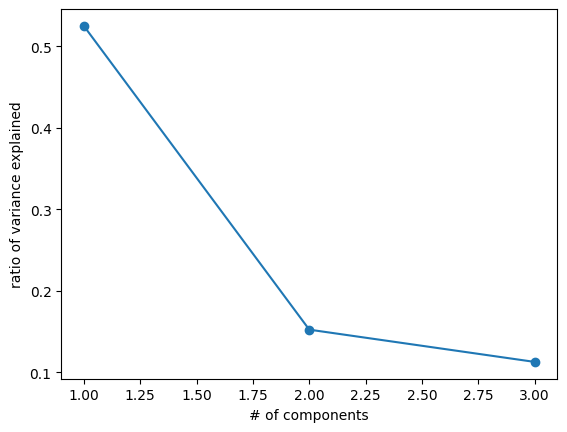

In [315]:
# 陡坡圖(scree plot)決定取幾個主成份 (通常取到累加70-80%)
shift_dr_mm.explained_variance_ratio_ # 各個主成份"詮釋資料集總變異量(也就是可解釋的意思)"的百分比(依序遞減排列)
import matplotlib.pyplot as plt
plt.plot(range(1, 4), shift_dr_mm.explained_variance_ratio_[:3], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')

# 快速計算累加百分比的方法
np.cumsum(shift_dr_mm.explained_variance_ratio_)

In [316]:
shift_df_pca_mm = pd.DataFrame(shift_pca_mm) 
shift_df_pca_mm['date'] = date_list

In [317]:
shift_df_pca_mm

,0,1,2,date
0,3.741477,4.479275,-2.559977,2011-01-31
1,3.731820,4.497863,-2.552629,2011-02-28
2,3.718115,4.526625,-2.525128,2011-03-31
3,3.698286,4.570837,-2.464640,2011-04-30
4,3.683492,4.589582,-2.389004,2011-05-31
...,...,...,...,...
154,-7.114717,0.268790,4.195450,2023-11-30
155,-7.194829,0.237427,4.129075,2023-12-31
156,-7.340818,0.170046,4.064317,2024-01-31
157,-7.505731,0.114345,3.989823,2024-02-29


In [318]:
shift_df_pca_mm.columns

Index([0, 1, 2, 'date'], dtype='object')

In [319]:
shift_df_pca_mm.columns = ['shift_PCA_mim_max_0', 'shift_PCA_mim_max_1', 'shift_PCA_mim_max_2', 'date']

In [320]:
shift_df_pca_mm

,shift_PCA_mim_max_0,shift_PCA_mim_max_1,shift_PCA_mim_max_2,date
0,3.741477,4.479275,-2.559977,2011-01-31
1,3.731820,4.497863,-2.552629,2011-02-28
2,3.718115,4.526625,-2.525128,2011-03-31
3,3.698286,4.570837,-2.464640,2011-04-30
4,3.683492,4.589582,-2.389004,2011-05-31
...,...,...,...,...
154,-7.114717,0.268790,4.195450,2023-11-30
155,-7.194829,0.237427,4.129075,2023-12-31
156,-7.340818,0.170046,4.064317,2024-01-31
157,-7.505731,0.114345,3.989823,2024-02-29


In [321]:
# 將日期轉乘datetime格式
shift_df_pca_mm['date'] = pd.to_datetime(shift_df_pca_mm['date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
shift_df_pca_mm['date'] = shift_df_pca_mm['date'].dt.to_period('M')

In [322]:
shift_df_pca_mm.to_csv('../../all_data/shift_pca_min_max.csv',encoding='utf-8', index=False)